# **Carbon Tracker**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the dataset
df = pd.read_csv("data source/india_carbon_dataset.csv")
df.shape  ## show no. row(data) & column(feature)

(150, 12)

In [3]:
# show sum of NAN entity
df.isnull().sum()

date                  0
state                 0
temperature           0
travel_km             0
electricity_units     0
food_impact           0
waste_kg              0
construction_score    0
agriculture_score     0
lifestyle_score       0
category              0
co2_emission_kg       0
dtype: int64

In [4]:
# show 1st five data from the database
df.head()

,date,state,temperature,travel_km,electricity_units,food_impact,waste_kg,construction_score,agriculture_score,lifestyle_score,category,co2_emission_kg
0,2024-01-01,West Bengal,22.83,40,244,1.95,2.06,0.60,0.09,0.24,Agriculture,264.71
1,2024-01-02,Gujarat,15.46,99,204,3.09,2.06,0.05,0.41,0.99,Agriculture,295.06
2,2024-01-03,Delhi,43.00,63,142,5.38,3.82,0.50,0.37,0.14,Waste,321.05
3,2024-01-04,Madhya Pradesh,30.03,26,209,4.96,2.53,0.60,0.26,0.50,Industrial,342.06
4,2024-01-05,Tamil Nadu,31.18,62,483,4.77,1.51,0.33,0.72,0.62,Electricity,475.84


## Train Model : Rendom Forest (Regression)

In [5]:
# features and target
features = ['temperature', 'travel_km', 'electricity_units', 'food_impact',
            'waste_kg', 'construction_score', 'agriculture_score',
            'lifestyle_score']
target = 'co2_emission_kg'

x = df[features]
y = df[target]

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [7]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 1268.21
R² Score: 0.67


### Plot

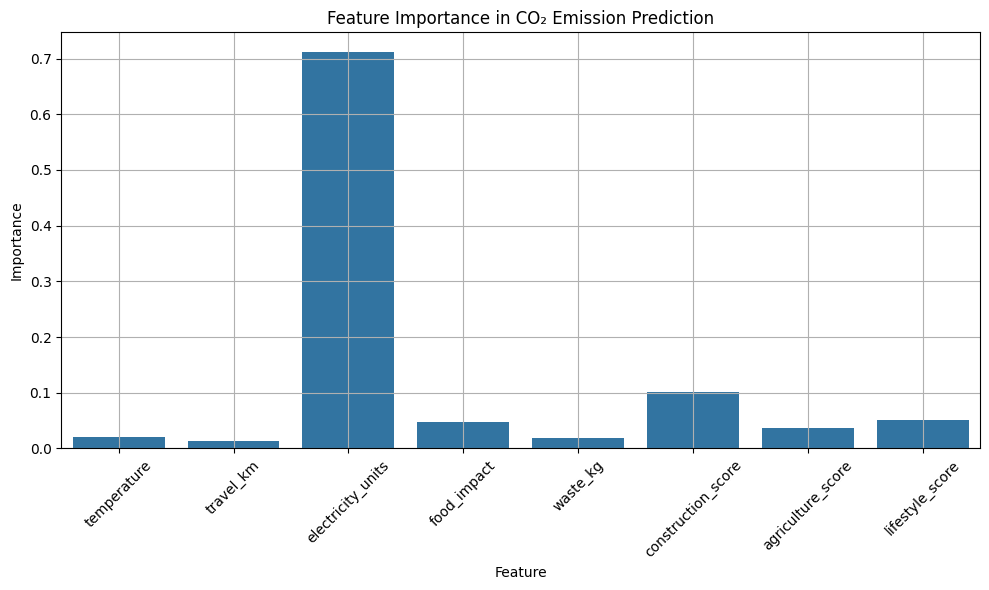

In [9]:
# Feature importance as a column chart (vertical bars)
importances = model.feature_importances_
feature_names = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=importances)  # Swap x and y
plt.title("Feature Importance in CO₂ Emission Prediction")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Horizontal Stacked Bar Chart: CO₂ by Fuel Type

In [10]:
# Load fuel-wise dataset
fuel_df = pd.read_csv("data source/International Energy Agency - CO2 emissions by fuel, India, 2022.csv")
fuel_summary = fuel_df.groupby("CO2 emissions by fuel, India, 2022")['Value'].sum().reset_index()

In [11]:
# Calculate percentage
fuel_summary['percentage'] = 100 * fuel_summary['Value'] / fuel_summary['Value'].sum()
fuel_summary = fuel_summary.sort_values(by='percentage', ascending=False).reset_index(drop=True)


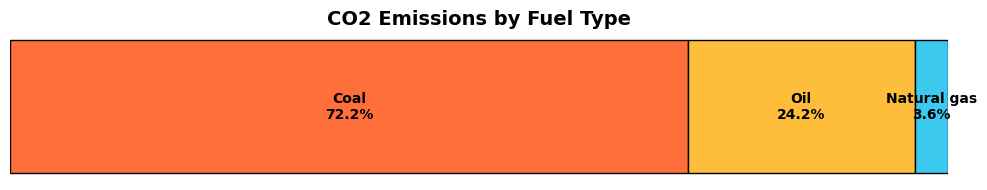

In [12]:
# Plot
colors = ['#FF6F3C', '#FFBD3C', '#3CC9F0', '#8AC926', '#6A4C93']  # extend if needed

fig, ax = plt.subplots(figsize=(10, 2))
start = 0
for i in range(len(fuel_summary)):
    fuel = fuel_summary.loc[i, 'CO2 emissions by fuel, India, 2022']
    pct = fuel_summary.loc[i, 'percentage']
    ax.barh(0, pct, left=start, color=colors[i % len(colors)], edgecolor='black')
    ax.text(start + pct/2, 0, f"{fuel}\n{pct:.1f}%", ha='center', va='center', fontsize=10, fontweight='bold')
    start += pct

ax.set_xlim(0, 100)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("CO2 Emissions by Fuel Type", fontsize=14, weight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

# Evolution of CO₂ Emissions by Fuel Over Time In India (2000–2022)

In [13]:
# Load file
df = pd.read_csv("data source/International Energy Agency - CO2 emissions by fuel in India.csv")
df.columns = ['Fuel', 'Value', 'Year', 'Units']
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [14]:
# Pivot the data: fuels become columns
pivot_df = df.pivot_table(index='Year', columns='Fuel', values='Value')

In [15]:
colors = {
    'Coal': '#FF6F3C',
    'Oil': '#FFBD3C',
    'Natural gas': '#3CC9F0'
}

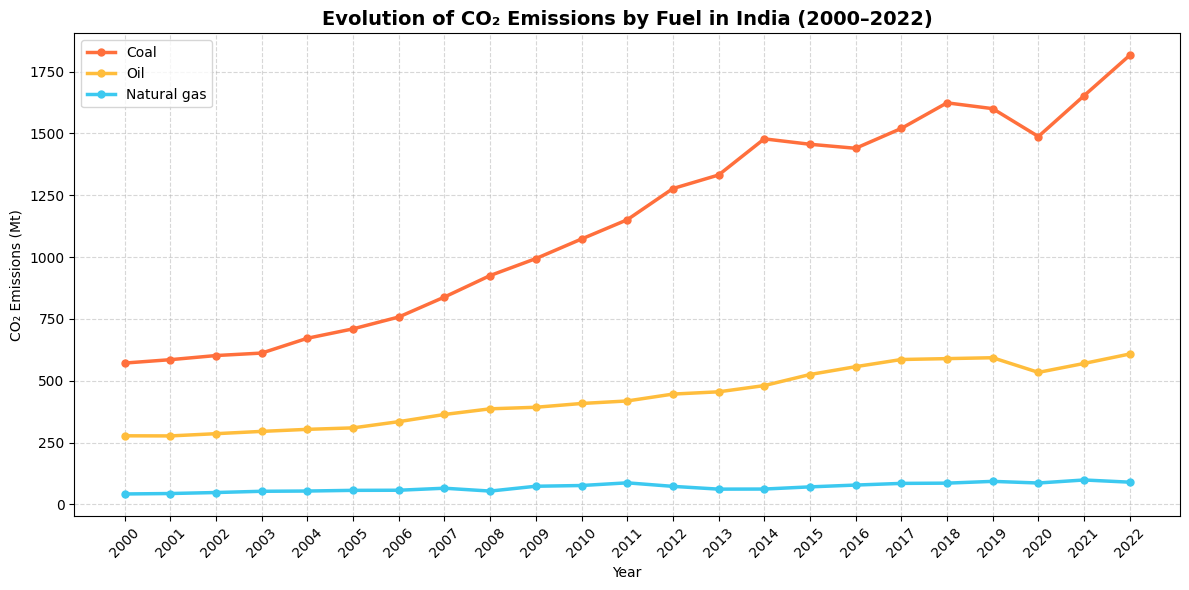

In [16]:
# Plot
plt.figure(figsize=(12, 6))

for fuel in ['Coal', 'Oil', 'Natural gas']:
    plt.plot(
        pivot_df.index,
        pivot_df[fuel],
        label=fuel,
        color=colors[fuel],
        linewidth=2.5,
        marker='o',
        markersize=5
    )

plt.title("Evolution of CO₂ Emissions by Fuel in India (2000–2022)", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Mt)")
plt.legend(title="", loc="upper left")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(pivot_df.index, rotation=45)
plt.tight_layout()
plt.show()


# Line Chart: Evolution of CO₂ Emissions by Fuel in India (2000–2022)

In [17]:
import plotly.graph_objects as go

# Load CSV file
df = pd.read_csv("data source/International Energy Agency - CO2 emissions by sector, India, 2022.csv")
df = df.iloc[:, :2]
df.dropna(inplace=True)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df['Percentage'] = 100 * df['Value'] / df['Value'].sum()

sector_col = 'CO2 emissions by sector, India, 2022'

# Prepare plotly traces
fig = go.Figure()
start = 0
for i, row in df.iterrows():
    fig.add_trace(go.Bar(
        y=['India 2022'],
        x=[row['Percentage']],
        name=row[sector_col],
        orientation='h',
        hovertemplate=f"<b>{row[sector_col]}</b><br>CO₂: {row['Value']:.1f} Mt<br>Share: {row['Percentage']:.1f}%",
        marker=dict(line=dict(width=0.5, color='black'))
    ))

# Layout
fig.update_layout(
    title="CO₂ Emissions by Sector in India — 2022",
    barmode='stack',
    showlegend=False,
    height=250,
    margin=dict(l=10, r=10, t=40, b=10)
)

fig.show()


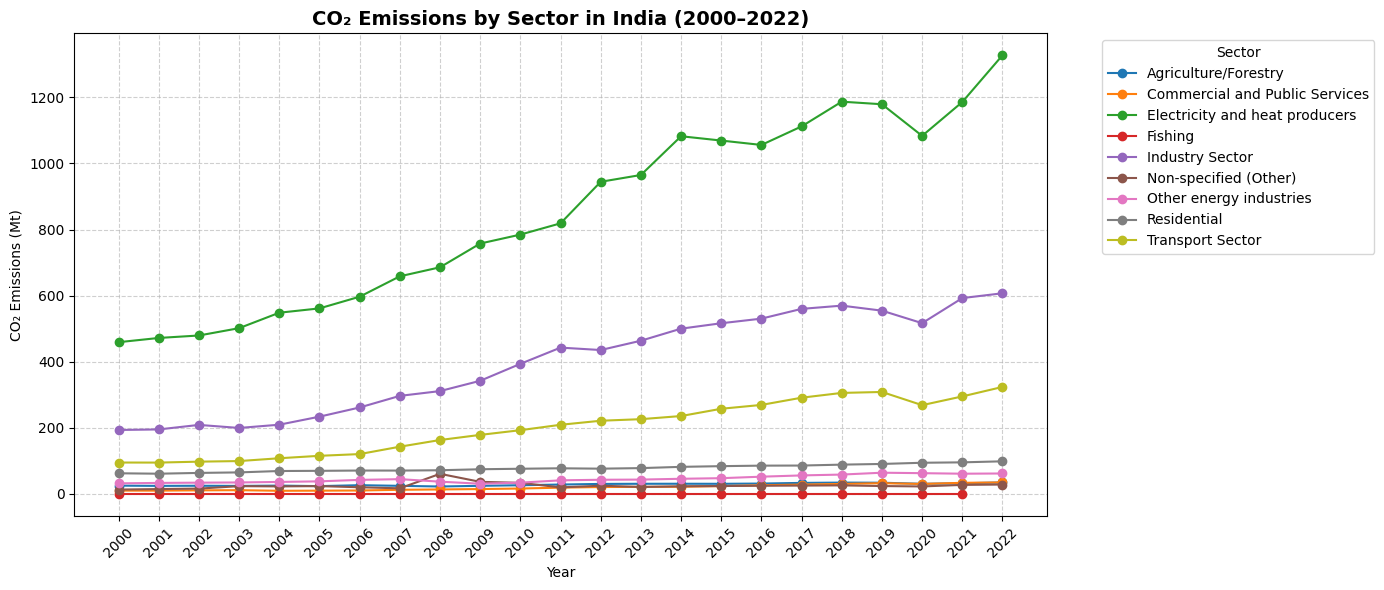

In [18]:
# Load the file
df = pd.read_csv("data source/International Energy Agency - CO2 emissions by sector in India.csv")  

# Clean and format the data
df.columns = ['CO2 emissions by sector in India', 'Value', 'Year', 'Units']
df = df.dropna(subset=['Value'])  # Drop rows with missing CO2 values
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Pivot the data to get sectors as columns and years as index
pivot_df = df.pivot_table(index='Year', columns='CO2 emissions by sector in India', values='Value', aggfunc='sum')

# Plot
plt.figure(figsize=(14, 6))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column, marker='o')

# 🧾 Labels and styling
plt.title("CO₂ Emissions by Sector in India (2000–2022)", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Mt)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(pivot_df.index, rotation=45)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Carbon Footprint Calculator

***
    Calculates the estimated CO2 emission (carbon footprint) based on user inputs,
    excluding state and category information.

    Args:
        temperature (float): Average daily temperature in Celsius.
        travel_km (float): Kilometers traveled (e.g., by vehicle).
        electricity_units (float): Electricity consumption in units.
        food_impact (float): A score representing food consumption impact (e.g., 1-10, higher is worse).
        waste_kg (float): Kilograms of waste generated.
        construction_score (float): A score representing construction-related impact (e.g., 1-10).
        agriculture_score (float): A score representing agriculture-related impact (e.g., 1-10).
        lifestyle_score (float): A score representing general lifestyle impact (e.g., 1-10).

    Returns:
        float: The estimated CO2 emission in kg.
    ***

In [19]:
# import pandas as pd
# import numpy as np

def calculate_carbon_footprint(
    temperature: float,
    travel_km: float,
    electricity_units: float,
    food_impact: float,
    waste_kg: float,
    construction_score: float,
    agriculture_score: float,
    lifestyle_score: float
) -> float:
   
    # Create a DataFrame for the input features
    input_data = pd.DataFrame([[
        temperature,
        travel_km,
        electricity_units,
        food_impact,
        waste_kg,
        construction_score,
        agriculture_score,
        lifestyle_score
    ]], columns=[
        'temperature', 'travel_km', 'electricity_units', 'food_impact',
        'waste_kg', 'construction_score', 'agriculture_score',
        'lifestyle_score'
    ])

    # Predict the CO2 emission using the trained model
    predicted_co2 = model.predict(input_data)[0]

    return predicted_co2


### Example :

In [20]:
# Example 1:
estimated_co2_1 = calculate_carbon_footprint(
    temperature=25,
    travel_km=150,
    electricity_units=300,
    food_impact=5,
    waste_kg=10,
    construction_score=3,
    agriculture_score=2,
    lifestyle_score=6
)
print(f"Estimated CO2 emission for Example 1: {estimated_co2_1:.2f} kg")

# Example 2:
estimated_co2_2 = calculate_carbon_footprint(
    temperature=30,
    travel_km=500,
    electricity_units=1500,
    food_impact=7,
    waste_kg=50,
    construction_score=8,
    agriculture_score=1,
    lifestyle_score=7
)
print(f"Estimated CO2 emission for Example 2: {estimated_co2_2:.2f} kg")


Estimated CO2 emission for Example 1: 431.66 kg
Estimated CO2 emission for Example 2: 505.09 kg
